In [144]:
from datetime import datetime, date, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [145]:
datetimes = []
sneezes = []
number_line = False
# read the data and create lists of datetimes and number of sneezes
with open('data/raw_data.html', 'r') as f:
    for line in f:
        # this line is related to datetime
        if "pull_right date details" in line:
            datetime_str = line.split('"')[-2]
            datetime_obj = datetime.strptime(datetime_str, '%d.%m.%Y %H:%M:%S')
            datetimes.append(datetime_obj)
        if number_line == True:
            number = int(line.split("\n")[0])
            sneezes.append(number)
        # this line is related to the number of sneezes
        if '<div class="text">' in line:
            number_line = True
        else:
            number_line = False

In [146]:
# general dataframe
df_datetime_sneeze = pd.DataFrame(list(zip(datetimes, sneezes)), columns=['datetimes','sneezes'])

In [147]:
# create new columns based on time properties
df_datetime_sneeze['year'] = df_datetime_sneeze['datetimes'].apply(lambda x: x.year)
df_datetime_sneeze['month'] = df_datetime_sneeze['datetimes'].apply(lambda x: x.month).sort_values()
df_datetime_sneeze['day'] = df_datetime_sneeze['datetimes'].apply(lambda x: x.day).sort_values()
df_datetime_sneeze['hour'] = df_datetime_sneeze['datetimes'].apply(lambda x: x.hour).sort_values()
df_datetime_sneeze['weekday'] = df_datetime_sneeze['datetimes'].apply(lambda x: x.strftime('%w')).sort_values()
df_datetime_sneeze['date'] = df_datetime_sneeze['datetimes'].apply(lambda x: date(x.year, x.month, x.day)).sort_values()

In [148]:
# creating the different dataframes for visualization
df_year = df_datetime_sneeze.groupby('year')['sneezes'].sum()
df_month = df_datetime_sneeze.groupby('month')['sneezes'].sum()
df_day = df_datetime_sneeze.groupby('day')['sneezes'].sum()
df_hour = df_datetime_sneeze.groupby('hour')['sneezes'].sum()
df_weekday = df_datetime_sneeze.groupby('weekday')['sneezes'].sum()
df_date = df_datetime_sneeze.groupby('date')['sneezes'].sum()

In [149]:
# print the highest streaks
print(df_datetime_sneeze.sort_values('sneezes', ascending=False))

              datetimes  sneezes  year  month  day  hour weekday        date
625 2022-01-12 12:49:26       21  2022      1   12    12       3  2022-01-12
616 2022-01-10 23:21:08       13  2022      1   10    23       1  2022-01-10
545 2021-11-14 01:46:05       13  2021     11   14     1       0  2021-11-14
686 2022-02-20 00:39:36       10  2022      2   20     0       0  2022-02-20
160 2021-02-27 09:50:04        8  2021      2   27     9       6  2021-02-27
..                  ...      ...   ...    ...  ...   ...     ...         ...
389 2021-05-25 09:04:00        1  2021      5   25     9       2  2021-05-25
391 2021-05-25 21:23:05        1  2021      5   25    21       2  2021-05-25
392 2021-05-26 12:12:48        1  2021      5   26    12       3  2021-05-26
394 2021-05-26 17:33:07        1  2021      5   26    17       3  2021-05-26
834 2022-06-04 19:58:52        1  2022      6    4    19       6  2022-06-04

[835 rows x 8 columns]


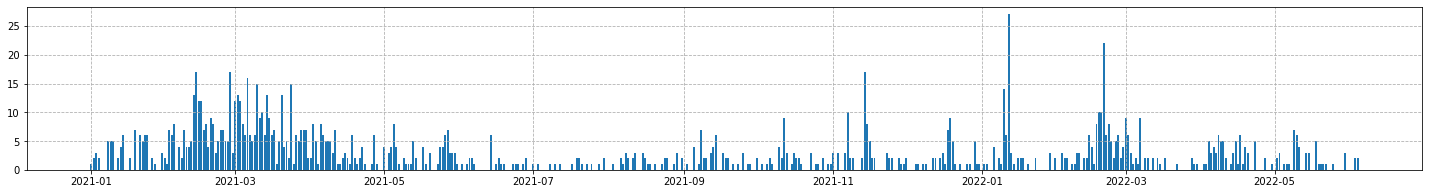

In [209]:
plt.rcParams["figure.figsize"] = (25, 3)
# plot the number of sneezes depending on the day
plt.bar(df_date.index.values, df_date.values)
plt.grid(linestyle='--')
plt.savefig('imgs/day.png', dpi=300, format='png')
plt.show()

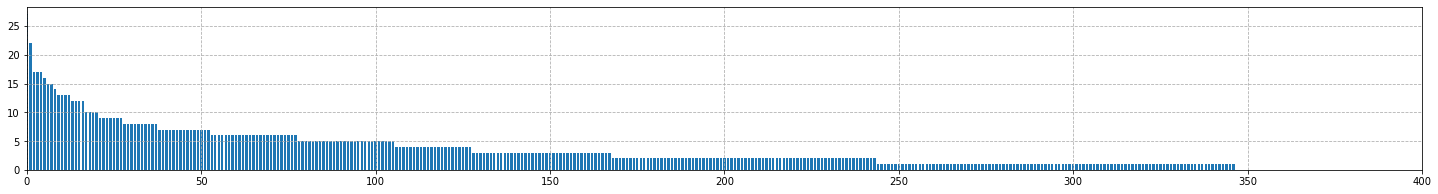

date
2022-01-12    27
2022-02-20    22
2021-11-14    17
2021-02-27    17
2021-02-13    17
              ..
2022-01-09     1
2021-08-17     1
2021-08-18     1
2022-01-03     1
2021-01-01     1
Name: sneezes, Length: 347, dtype: int64


In [219]:
plt.rcParams["figure.figsize"] = (25, 3)
df_date_sorted = df_date.sort_values(ascending=False)
# plot the number of sneezes depending on the day sorted
plt.bar(range(len(df_date_sorted.values)), df_date_sorted.values, width=0.7)
plt.xlim([0, 400])
plt.grid(linestyle='--')
plt.savefig('imgs/day_sorted.png', dpi=300, format='png')
plt.show()
print(df_date_sorted)

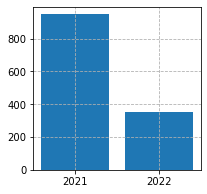

year
2021    947
2022    354
Name: sneezes, dtype: int64


In [217]:
plt.rcParams["figure.figsize"] = (3, 3)
# plot the number of sneezes depending on the year
plt.bar(df_year.index.values, df_year.values)
plt.xticks(df_year.index.values, ['2021', '2022'])
plt.grid(linestyle='--')
plt.savefig('imgs/year.png', dpi=300, format='png')
plt.show()
print(df_year)

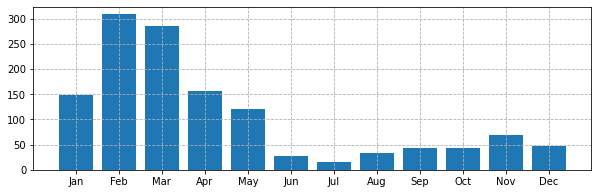

In [212]:
plt.rcParams["figure.figsize"] = (10, 3)
# plot the number of sneezes depending on the month
plt.bar(df_month.index.values, df_month.values)
plt.xticks(df_month.index.values, ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(linestyle='--')
plt.savefig('imgs/month.png', dpi=300, format='png')
plt.show()

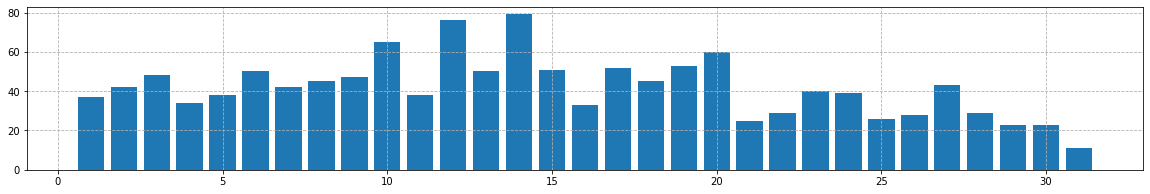

In [213]:
plt.rcParams["figure.figsize"] = (20, 3)
# plot the number of sneezes depending on the day of the month
plt.bar(df_day.index.values, df_day.values)
plt.grid(linestyle='--')
plt.savefig('imgs/day_number.png', dpi=300, format='png')
plt.show()

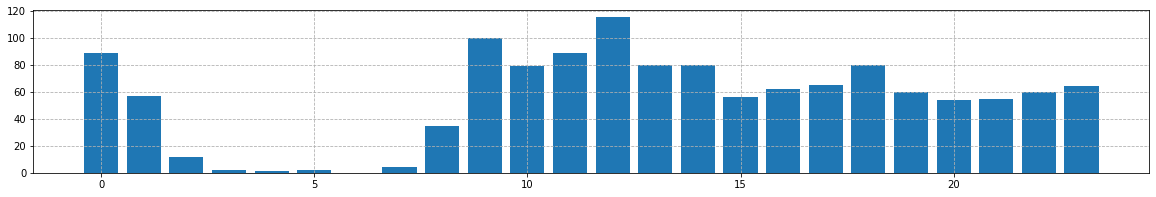

In [214]:
plt.rcParams["figure.figsize"] = (20, 3)
# plot the number of sneezes depending on the hour
plt.grid(linestyle='--')
plt.bar(df_hour.index.values, df_hour.values)
plt.savefig('imgs/hour.png', dpi=300, format='png')
plt.show()

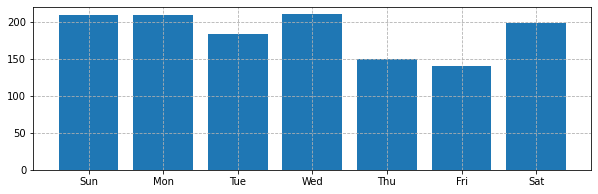

In [215]:
plt.rcParams["figure.figsize"] = (10, 3)
# plot the number of sneezes depending on the day of the week
plt.bar(df_weekday.index.values, df_weekday.values)
plt.xticks(df_weekday.index.values, ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'])
plt.grid(linestyle='--')
plt.savefig('imgs/weekday.png', dpi=300, format='png')
plt.show()